In [1]:
import pandas as pd

In [3]:
data = pd.read_csv(f'..\\stats_report\\monthly_reports\\DealerUsageReport_April_25.csv')



In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2405 entries, 0 to 2404
Data columns (total 54 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Serial                        2405 non-null   int64  
 1   DeploymentId                  2403 non-null   object 
 2   Name                          2396 non-null   object 
 3   DBA                           1226 non-null   object 
 4   InvHub-Invoices               2405 non-null   int64  
 5   InvHub-Statements             2405 non-null   int64  
 6   EP-Unknown                    2405 non-null   int64  
 7   EP-Unknown-PAID               2405 non-null   int64  
 8   EP-SO                         2405 non-null   int64  
 9   EP-SO-PAID                    2405 non-null   int64  
 10  EP-PartsDeposit               2405 non-null   int64  
 11  EP-PartsDeposit-PAID          2405 non-null   int64  
 12  EP-SalesDeposit               2405 non-null   int64  
 13  EP-

Things to do on teh dataset


- Identify the goal of the report 
- Identify key metrics that are being measured
- Identify the data that provides 
- Identify data transformations that need to be performed for efficient reporting
- 

In [8]:
# Normalization: 
# create a client df that will store all client information. Serial #, client name, and DBA
# Create a fact fact table that has serial number, deployment ID, and all the usage information
client_df = data[['Serial', 'Name', 'DBA']].drop_duplicates().reset_index(drop=True)
client_df.columns = ['Serial', 'ClientName', 'DBA']

In [ ]:
# Create a fact fact table that has serial number, deployment ID, and all the usage information
user_activity_df = data.drop(columns=['Name', 'DBA']).reset_index(drop=True) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2405 entries, 0 to 2404
Data columns (total 52 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Serial                        2405 non-null   int64  
 1   DeploymentId                  2403 non-null   object 
 2   InvHub-Invoices               2405 non-null   int64  
 3   InvHub-Statements             2405 non-null   int64  
 4   EP-Unknown                    2405 non-null   int64  
 5   EP-Unknown-PAID               2405 non-null   int64  
 6   EP-SO                         2405 non-null   int64  
 7   EP-SO-PAID                    2405 non-null   int64  
 8   EP-PartsDeposit               2405 non-null   int64  
 9   EP-PartsDeposit-PAID          2405 non-null   int64  
 10  EP-SalesDeposit               2405 non-null   int64  
 11  EP-SalesDeposit-PAID          2405 non-null   int64  
 12  EP-Invoice                    2405 non-null   int64  
 13  EP-

In [20]:
# Number of client with null value values in ClientName

print(client_df[~client_df["ClientName"].notnull()])

(len(client_df[~client_df["ClientName"].notnull()]), "Clients with null ClientName values")

      Serial ClientName  DBA
788     5192        NaN  NaN
870     5281        NaN  NaN
888     5303        NaN  NaN
1228    5907        NaN  NaN
1609    6827        NaN  NaN
1644    6869        NaN  NaN
1730    7052        NaN  NaN
1872    7323        NaN  NaN
1882    7333        NaN  NaN


(9, 'Clients with null ClientName values')

## 1. the Goal

- Create an improved report using PowerBI to offer insight on user activity for the OEM Accessory feature
- Identify key metrics that are useful for product tracking 
    - Top ten client using the product often
    - Top users per client
    
    - Average daily usage per user (will need to filter for client with the feature enabled)
    - Average usage per user position 
    - 

- 


In [22]:
from sqlalchemy import create_engine

In [1]:
user = 'root'
password = 'password'
host = '127.0.0.1'
port = 3306
database = 'GeeksForGeeks'

def get_connection():
    return create_engine(
        url="mysql+pymysql://{0}:{1}@{2}:{3}/{4}".format(
            user, password, host, port, database
        )
    )


if __name__ == '__main__':

    try:
      
        # GET THE CONNECTION OBJECT (ENGINE) FOR THE DATABASE
        engine = get_connection()
        print(
            f"Connection to the {host} for user {user} created successfully.")
    except Exception as ex:
        print("Connection could not be made due to the following error: \n", ex)

Connection could not be made due to the following error: 
 name 'create_engine' is not defined


In [128]:
from dotenv import load_dotenv
import os
load_dotenv(dotenv_path="creds\\.env")

True

pbs8805!


In [131]:
from sqlalchemy import create_engine, text

# Connection details
server = os.getenv('SERVER_NAME')
database = os.getenv('DATABASE')
username = os.getenv('USER_NAME')
password = os.getenv('PASSWORD')
driver = os.getenv("ODBC_DRIVER")

# Build the connection string
connection_string = (
    f"mssql+pyodbc://{username}:{password}@{server}/{database}"
    f"?driver={driver.replace(' ', '+')}"
)

# Create the SQLAlchemy engine
engine = create_engine(connection_string)

# Test the connection
try:
    with engine.connect() as conn:
        result = conn.execute(text("SELECT @@VERSION"))
        for row in result:
            print("Connected successfully. SQL Server version:")
            print(row[0])
except Exception as e:
    print("Connection failed:")
    print(e)


Connected successfully. SQL Server version:
Microsoft SQL Azure (RTM) - 12.0.2000.8 
	Apr  9 2025 07:13:50 
	Copyright (C) 2024 Microsoft Corporation



In [22]:
import pandas as pd

query = "SELECT * FROM dbo.tblActivityLog WHERE fldKey = 'Deal.Accessories.OEM'"
tbl_activityLog = pd.read_sql(query, engine)
print(tbl_activityLog.head())


       fldId fldSerialNumber     fldDate  fldUserRef                fldKey  \
0  170509361            7415  2025-01-01        1031  Deal.Accessories.OEM   
1  170806930            7831  2025-01-02         273  Deal.Accessories.OEM   
2  170858122            5234  2025-01-02         439  Deal.Accessories.OEM   
3  170858724            5235  2025-01-02         511  Deal.Accessories.OEM   
4  170858796            5235  2025-01-02         522  Deal.Accessories.OEM   

   fldCount  
0         1  
1         1  
2         2  
3         3  
4         1  


In [23]:
tbl_activityLog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1786 entries, 0 to 1785
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   fldId            1786 non-null   int64 
 1   fldSerialNumber  1786 non-null   object
 2   fldDate          1786 non-null   object
 3   fldUserRef       1786 non-null   int64 
 4   fldKey           1786 non-null   object
 5   fldCount         1786 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 83.8+ KB


In [24]:
df = tbl_activityLog.copy()

# Cleaning the dataset 

# Drop all records with 
# Serial number contains non-numeric values (Removes QA serial Numbers (.QA), and Null)
# 


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1772 entries, 0 to 1785
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   fldId            1772 non-null   int64         
 1   fldSerialNumber  1772 non-null   object        
 2   fldDate          1772 non-null   datetime64[ns]
 3   fldUserRef       1772 non-null   int64         
 4   fldKey           1772 non-null   object        
 5   fldCount         1772 non-null   int64         
 6   Month            1772 non-null   int32         
 7   Year             1772 non-null   int32         
 8   Day_of_Week      1772 non-null   object        
 9   Day              1772 non-null   int32         
dtypes: datetime64[ns](1), int32(3), int64(3), object(3)
memory usage: 131.5+ KB


In [ ]:
# find how many serial number have non-numeric values in Serial field

def find_non_numeric_serial_numbers(df):
    non_numeric_serials = len(df[~df['fldSerialNumber'].str.isnumeric()]['fldSerialNumber'].unique().tolist())
    print("This dataframe has", non_numeric_serials, "non-numeric serial numbers.\n")
    if non_numeric_serials > 0:
        print("These are the non-numeric serial numbers:\n")
        print(df[~df['fldSerialNumber'].str.isnumeric()]['fldSerialNumber'].unique())
        return
    print("All serial numbers are numeric.")

    return 


In [ ]:
# remove all non-numeric serial numbers from the dataframe

def remove_non_numeric_serial_numbers(df):
    df = df[df['fldSerialNumber'].str.isnumeric()]
    print("The dataframe has been cleaned of non-numeric serial numbers.")
    return df

In [ ]:

# Method to decompose a date field into Year, Month, Day, and Day_of_week

def decompose_date_field(df, date_field):
    df[date_field] = pd.to_datetime(df[date_field], errors='coerce')
    df['Year'] = df[date_field].dt.year
    df['Month'] = df[date_field].dt.month
    df['Day'] = df[date_field].dt.day
    df["Day_of_week"] = df[date_field].dt.day_name()
    return df

,fldId,fldSerialNumber,fldDate,fldUserRef,fldKey,fldCount,Month,Year,Day_of_Week,Day
0,170509361,7415,2025-01-01,1031,Deal.Accessories.OEM,1,1,2025,Wednesday,1
1,170806930,7831,2025-01-02,273,Deal.Accessories.OEM,1,1,2025,Thursday,2
2,170858122,5234,2025-01-02,439,Deal.Accessories.OEM,2,1,2025,Thursday,2
3,170858724,5235,2025-01-02,511,Deal.Accessories.OEM,3,1,2025,Thursday,2
4,170858796,5235,2025-01-02,522,Deal.Accessories.OEM,1,1,2025,Thursday,2


In [ ]:
# Number of records in the table grouped by Year and Month
df.groupby(['Year', 'Month'])["fldCount"].count().reset_index(name='TotalCount')

,Year,Month,TotalCount
0,2025,1,242
1,2025,2,279
2,2025,3,424
3,2025,4,487
4,2025,5,354


In [57]:
df.groupby(['Year', 'fldSerialNumber'])["fldCount"].sum().reset_index(name='TotalCount')

,Year,fldSerialNumber,TotalCount
0,2025,2045,2
1,2025,2340,1
2,2025,3027,31
3,2025,3121,6
4,2025,3166,1
...,...,...,...
68,2025,7718,7
69,2025,7718.QA,1
70,2025,7831,127
71,2025,7832,2


<Axes: title={'center': 'Monthly Activity Log Counts'}, xlabel='Month'>

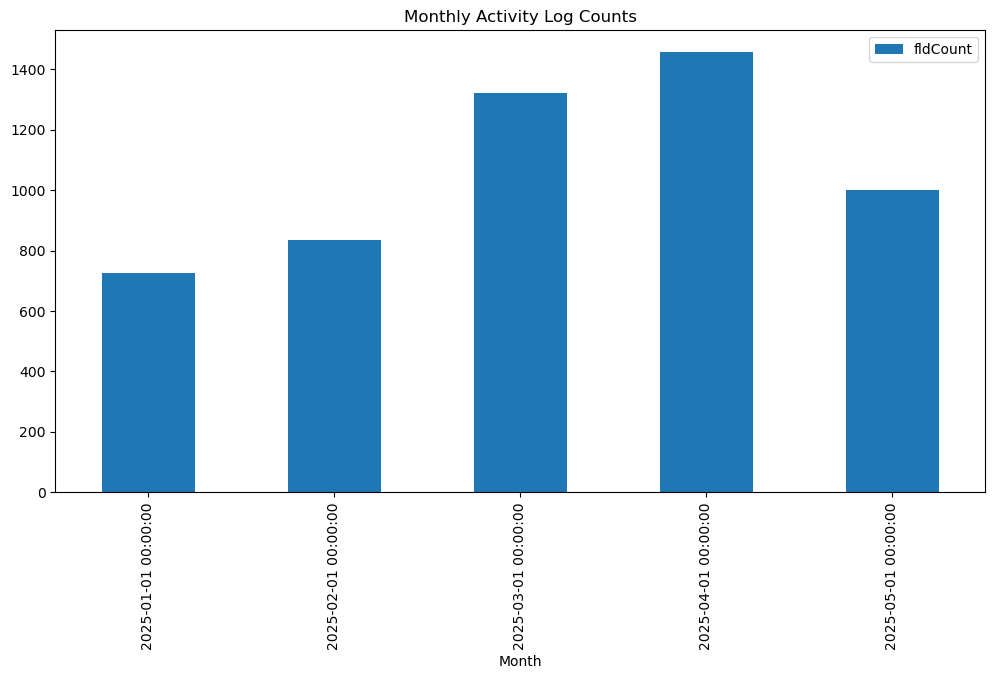

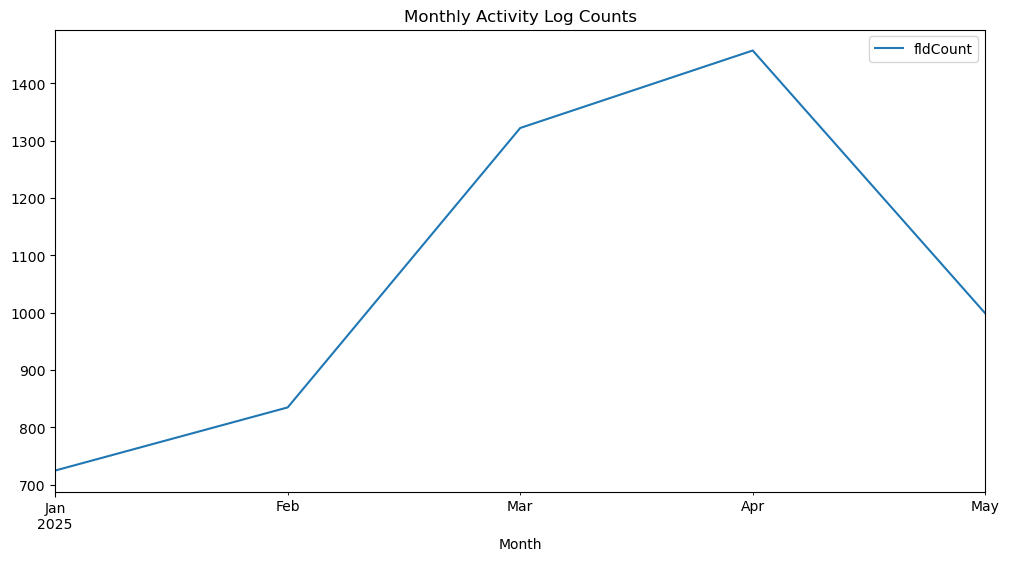

In [25]:
# df.groupby("fldDate")["fldCount"].sum().plot(kind='bar', figsize=(12, 6), title='Daily Activity Log Counts')

# can you group by fldDate by month of year and plot the sum of fldCount for each month?
df['fldDate'] = pd.to_datetime(df['fldDate'])
df['Month'] = df['fldDate'].dt.to_period('M')
monthly_counts = df.groupby('Month')['fldCount'].sum().reset_index()
monthly_counts['Month'] = monthly_counts['Month'].dt.to_timestamp()
monthly_counts.plot(x='Month', y='fldCount', kind='bar', figsize=(12, 6), title='Monthly Activity Log Counts')


# change this graph to a line graph
monthly_counts.plot(x='Month', y='fldCount', kind='line', figsize=(12, 6), title='Monthly Activity Log Counts')

<Axes: title={'center': 'Daily Activity Log Counts by Day of Week'}, xlabel='DayOfWeek'>

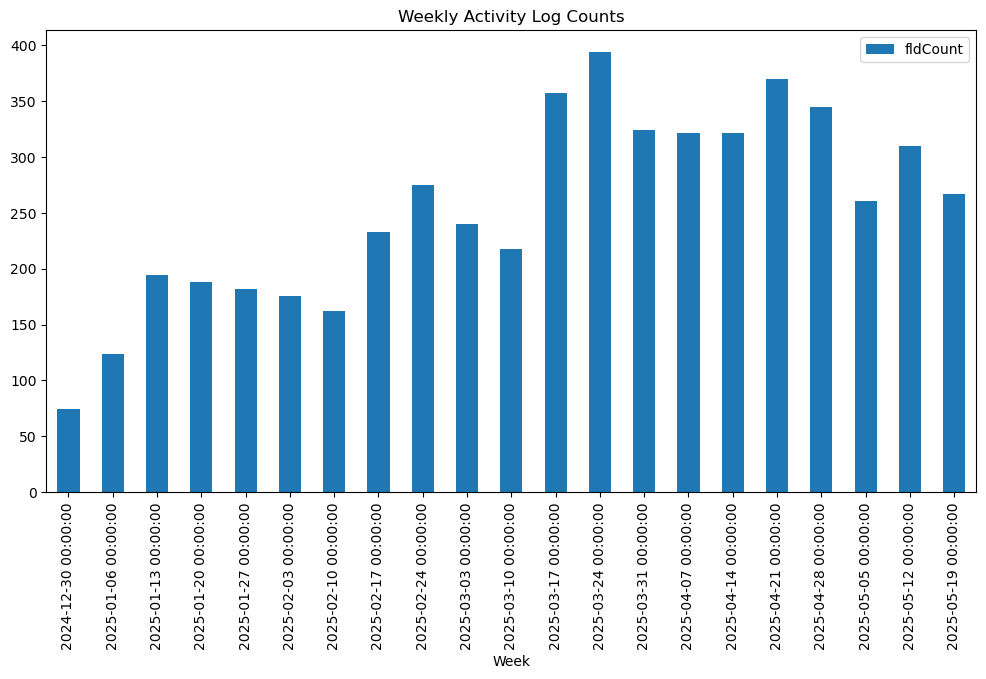

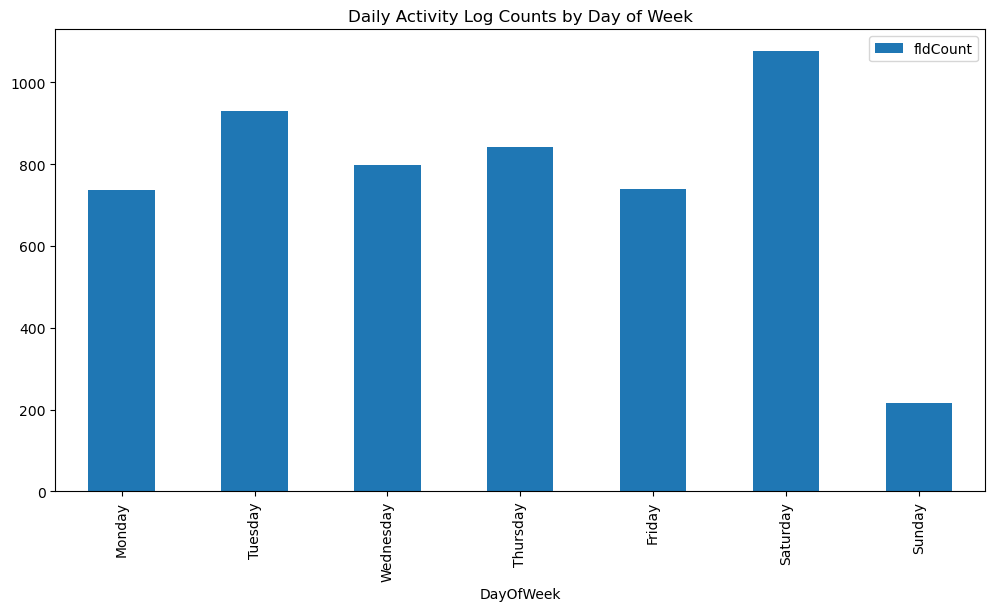

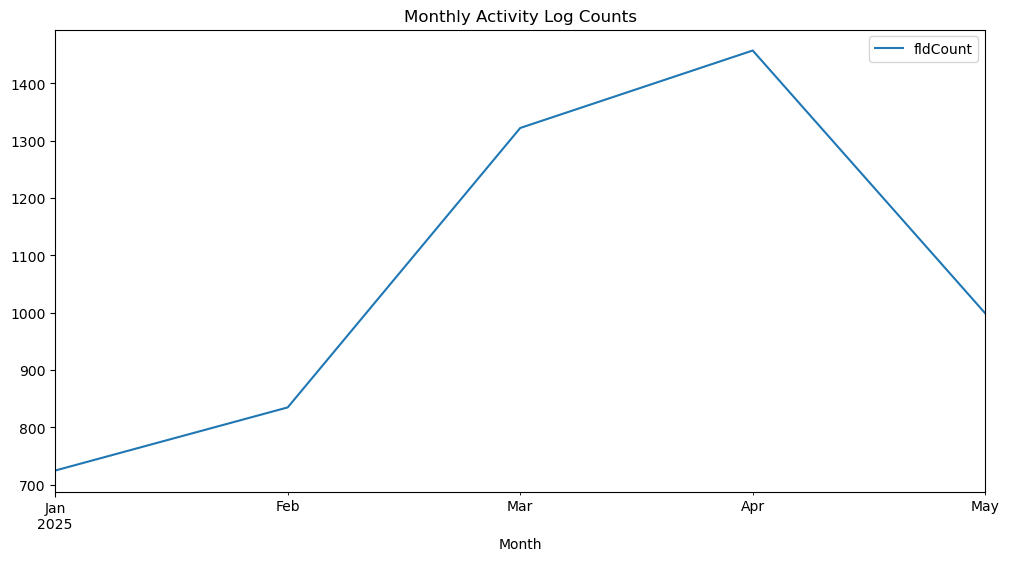

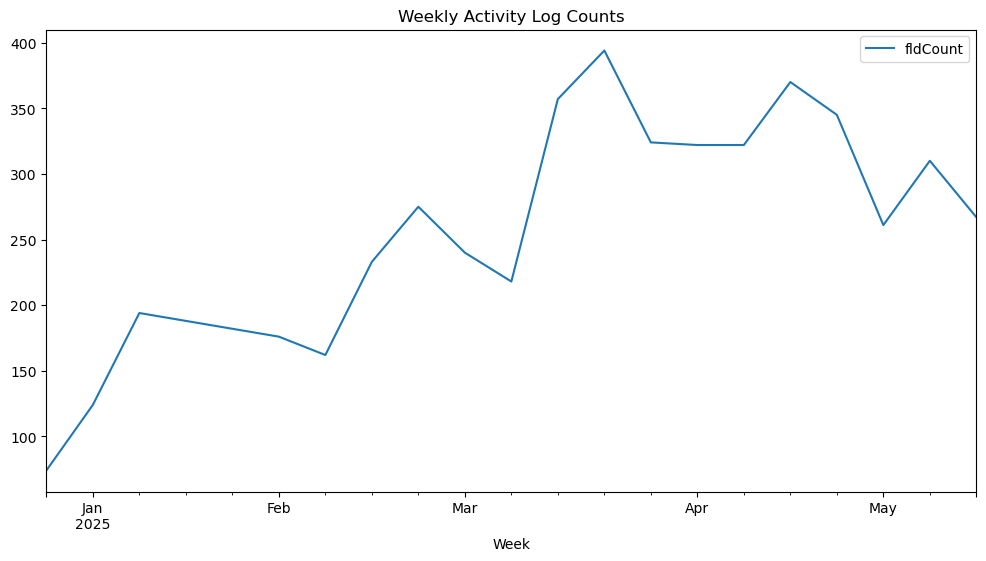

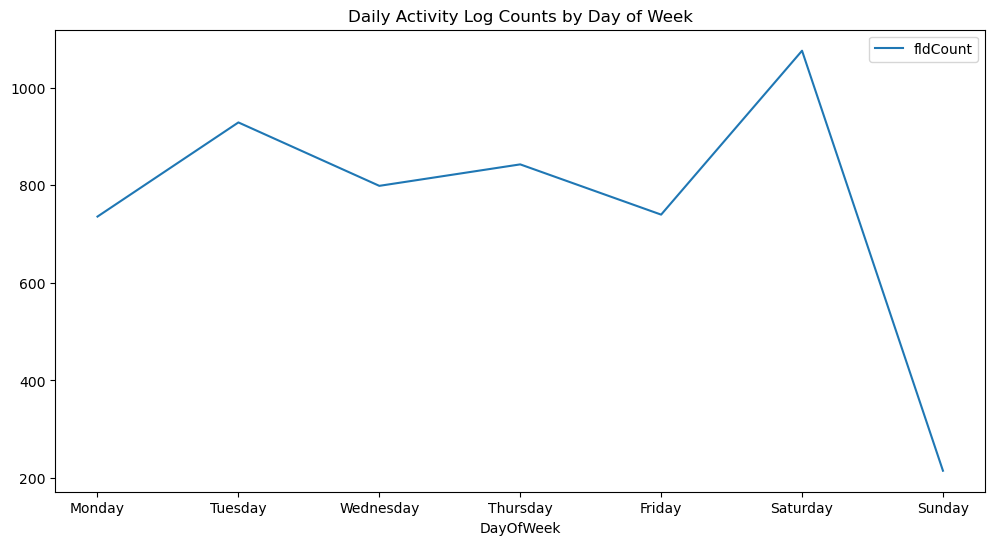

In [ ]:
# Show sum of fldcount by week of month 
df['Week'] = df['fldDate'].dt.to_period('W')
weekly_counts = df.groupby('Week')['fldCount'].sum().reset_index()
weekly_counts['Week'] = weekly_counts['Week'].dt.to_timestamp()
weekly_counts.plot(x='Week', y='fldCount', kind='bar', figsize=(12, 6), title='Weekly Activity Log Counts')


# Show sum of fldcount by day of week
df['DayOfWeek'] = df['fldDate'].dt.day_name()
daily_counts = df.groupby('DayOfWeek')['fldCount'].sum().reset_index()
daily_counts = daily_counts.sort_values('DayOfWeek', key=lambda x: pd.Categorical(x, categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True))
daily_counts.plot(x='DayOfWeek', y='fldCount', kind='bar', figsize=(12, 6), title='Daily Activity Log Counts by Day of Week')



# Change these graphs to line graphs
monthly_counts.plot(x='Month', y='fldCount', kind='line', figsize=(12, 6), title='Monthly Activity Log Counts')
weekly_counts.plot(x='Week', y='fldCount', kind='line', figsize=(12, 6), title='Weekly Activity Log Counts')
daily_counts.plot(x='DayOfWeek', y='fldCount', kind='line', figsize=(12, 6), title='Daily Activity Log Counts by Day of Week')



In [28]:
df.head(100)

,fldId,fldSerialNumber,fldDate,fldUserRef,fldKey,fldCount,Month
0,170509361,7415,2025-01-01,1031,Deal.Accessories.OEM,1,2025-01
1,170806930,7831,2025-01-02,273,Deal.Accessories.OEM,1,2025-01
2,170858122,5234,2025-01-02,439,Deal.Accessories.OEM,2,2025-01
3,170858724,5235,2025-01-02,511,Deal.Accessories.OEM,3,2025-01
4,170858796,5235,2025-01-02,522,Deal.Accessories.OEM,1,2025-01
...,...,...,...,...,...,...,...
95,175355877,5235,2025-01-15,524,Deal.Accessories.OEM,1,2025-01
96,175456703,5462,2025-01-15,784,Deal.Accessories.OEM,1,2025-01
97,175417280,7415,2025-01-15,1030,Deal.Accessories.OEM,2,2025-01
98,175557221,5622,2025-01-16,29,Deal.Accessories.OEM,2,2025-01
